In [1]:
# Load required libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Problem Description

Unfortunately in the world today, life expectancy can be very different depending on what country you live in. The good news is life expectancy has been increasing globally over the years. In this project we'll look at data on 193 countries from 2000-2015 that includes information such as adult mortality rate and infant deaths. We'll build multiple linear regression models to see if we can accurately predict life expectancy for a country using its data. With this we'll see what features are significant for life expectancy so that countries could potentially focus on improving certain things to allow people to live longer.

The dataset we'll be using is curated by Deeksha Russell and Duan Wang from the WHO and United Nations websites. It contains 22 features for 2,938 data points. A few countries were excluded as it was hard to collect data on them. We will clean this data and determine which features to use in our models.

# Data Inspection

First let's load the data.

In [2]:
# Load Data

data = pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv")

Now let's do some basic inspection of the data.

In [3]:
# First five rows

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Info about the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Summary statistics of the features

data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We can see there are features that won't be used and some features contain missing values, so we need to clean the data.

# Data Cleaning

First we need to rename the features for easy reference.

In [6]:
# rename columns

data.columns = ['Country','Year','Status','Life_Expectancy','Adult_Mortality','Infant_Deaths','Alcohol','Per_Expenditure','Hep_B','Measles','BMI','Under_5_Deaths','Polio','Total_Expenditure','Diphtheria','HIV_AIDS','GDP','Population','Thinness_10_19','Thinness_5_9','Income_Comp_Resources','Schooling']

We'll remove the 'Country' and 'Year' features as these won't be used for prediction.

In [7]:
# Remove 'Country' and 'Year'

data_clean = data.drop(columns=['Country','Year'])

'Life Expectancy' contains missing values, and since this is our target we don't want to fill in these by inferring what they are based on other data. We'll go ahead and remove the data points that contain missing values for 'Life Expectancy'.

In [8]:
# Remove 'Life_Expectancy' missing values

data_clean = data_clean[data_clean['Life_Expectancy'].notna()]

Let's take another look at what features contain missing values.

In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Status                 2928 non-null   object 
 1   Life_Expectancy        2928 non-null   float64
 2   Adult_Mortality        2928 non-null   float64
 3   Infant_Deaths          2928 non-null   int64  
 4   Alcohol                2735 non-null   float64
 5   Per_Expenditure        2928 non-null   float64
 6   Hep_B                  2375 non-null   float64
 7   Measles                2928 non-null   int64  
 8   BMI                    2896 non-null   float64
 9   Under_5_Deaths         2928 non-null   int64  
 10  Polio                  2909 non-null   float64
 11  Total_Expenditure      2702 non-null   float64
 12  Diphtheria             2909 non-null   float64
 13  HIV_AIDS               2928 non-null   float64
 14  GDP                    2485 non-null   float64
 15  Popu

There are 10 of the 20 features that contain missing values. For features where less than 5% are missing values, we can fill in these values. Any features that contain more than 5% missing values will need to be removed. The threshold can be seen below.

In [10]:
# 95% threshold

print(math.ceil(0.95 * len(data_clean)))

2782


Features that contain less than 2,782 non-missing values will be removed.

In [11]:
# Remove features with more than 5% missing values

data_clean = data_clean.drop(columns=['Alcohol','Hep_B','Total_Expenditure','GDP','Population','Income_Comp_Resources','Schooling'])

All the features that remain with missing values are numerical. So we'll take a look at each feature's distribution to see if we should fill in the missing values with the mean (normally distributed) or median (skewed).

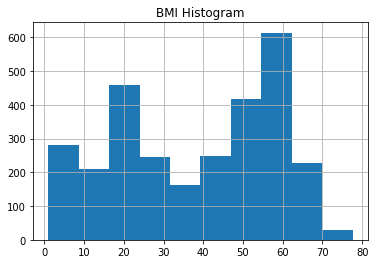

In [12]:
# BMI Distribution

data_clean['BMI'].hist()
plt.title('BMI Histogram')
plt.show()

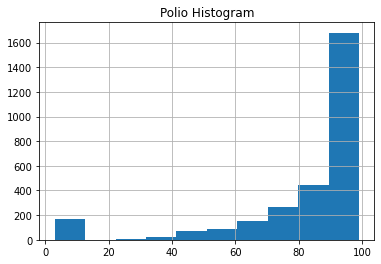

In [13]:
# Polio Distribution

data_clean['Polio'].hist()
plt.title('Polio Histogram')
plt.show()

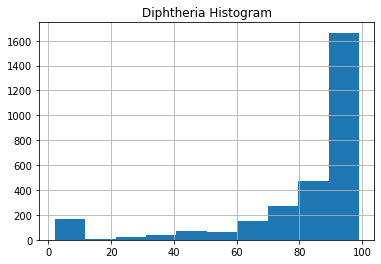

In [14]:
# Diphtheria Distribution

data_clean['Diphtheria'].hist()
plt.title('Diphtheria Histogram')
plt.show()

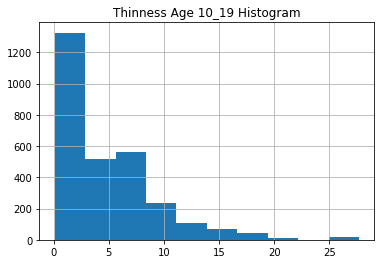

In [15]:
# Thinness 10-19 Distribution

data_clean['Thinness_10_19'].hist()
plt.title('Thinness Age 10_19 Histogram')
plt.show()

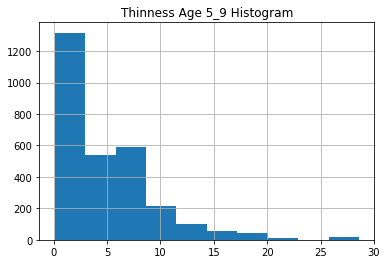

In [16]:
# Thinness 5-9 Distribution

data_clean['Thinness_5_9'].hist()
plt.title('Thinness Age 5_9 Histogram')
plt.show()

All of the features above are skewed to the right or left, so we'll replace all the missing values with each features' median.

In [17]:
# Fill in missing values

values = {'BMI':data_clean['BMI'].median(), 'Polio':data_clean['Polio'].median(), 'Diphtheria':data_clean['Diphtheria'].median(), 'Thinness_10_19':data_clean['Thinness_10_19'].median(), 'Thinness_5_9':data_clean['Thinness_5_9'].median()}
data_clean = data_clean.fillna(value=values)

# Exploratory Data Analysis and Data Preprocessing

Now that we have cleaned our data, we can perform exploratory data analysis to learn more about our data and determine if we have more cleaning to do.

First we'll look at the correlation plot between the features.

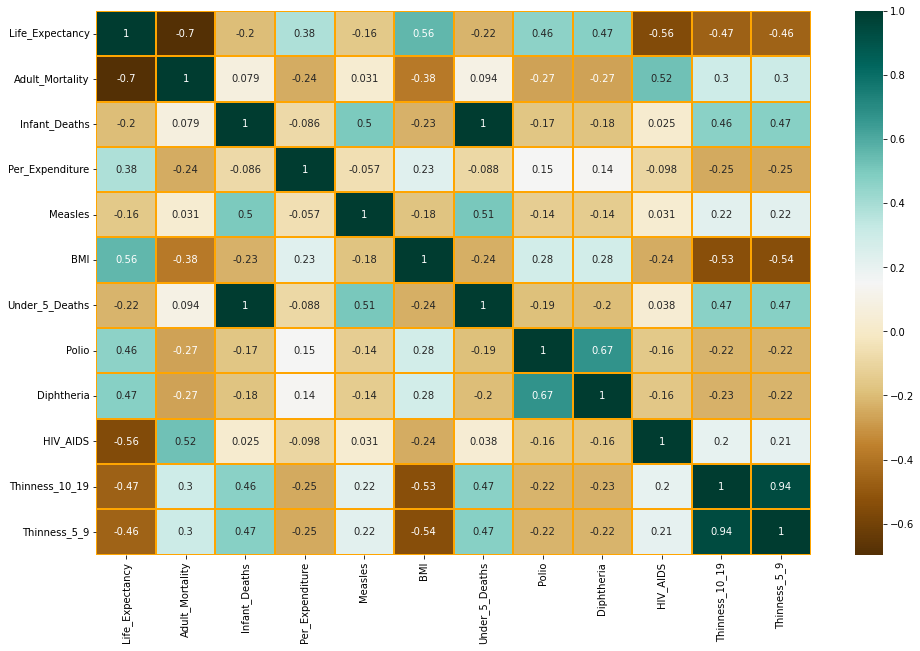

In [18]:
# Correlation Plot

plt.figure(figsize=(16, 10))
sns.heatmap(data_clean.corr(), annot=True, cmap='BrBG', linewidths=0.1, linecolor='orange')
plt.show()

First thing to look at in the plot is to see if any potential predictors are correlated with each other. If there are correlated features, one will need to be removed so that the correlated features don't skew the models. In the plot, 'Under 5 Deaths' and 'Infant Deaths' have a correlation coefficient of 1, which is not surprising. We'll remove 'Infant Deaths' since it is slightly less correlated with 'Life Expectancy'. 'Diphtheria' and 'Polio' have a correlation coefficient of 0.67, so we'll remove 'Polio'. 'Thinness 5-9' has a 0.94 correlation coefficient with 'Thinness 10-19', which is also not surprising. 'Thinness 5-9' will be removed as well.

The second thing to look at is what features are more correlated with 'Life Expectancy'. We can guess higher correlated features are more significant in predicting 'Life Expectancy'. We see 'Adult Mortality', 'BMI', and 'HIV/AIDS' have a correlation greater than 0.5 with life expectancy. 'Diphtheria' and 'Thinness 10-19' have a correlation greater than 0.4 with life expectancy.

In [19]:
# Remove correlated features

data_final = data_clean.drop(columns=['Infant_Deaths','Polio','Thinness_5_9'])

Now we'll look at each feature's individual distribution, starting with the categorical variable 'Status'.

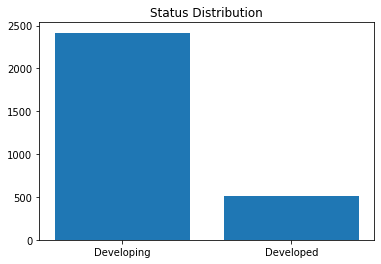

In [21]:
# Status barplot

plt.bar(data_final['Status'].unique(), data_final['Status'].value_counts())
plt.title('Status Distribution')
plt.show()

The vast majority of the data points, almost 2,500, are developing countries, whereas only about 500 are developed countries.

Now we'll look at boxplots of the 9 numerical features.

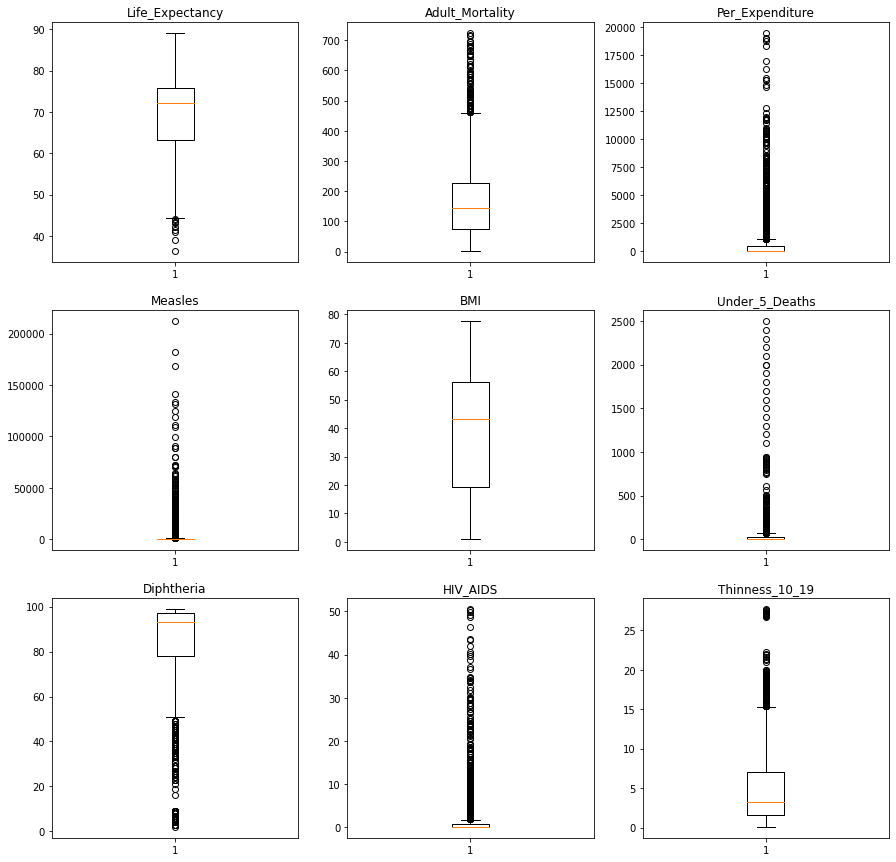

In [22]:
# Numerical features boxplots

fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(data_final.iloc[:,i])
    plt.title(data_final.columns[i])

Looking at the boxplots, we see all features except BMI contain a lot of outliers. An outlier hear is determined by greater than $Q3 + 1.5 * IQR$ or less than $Q1 - 1.5 * IQR$. Let's take a look at these features' histograms to see the distribution and their descriptive statistics.

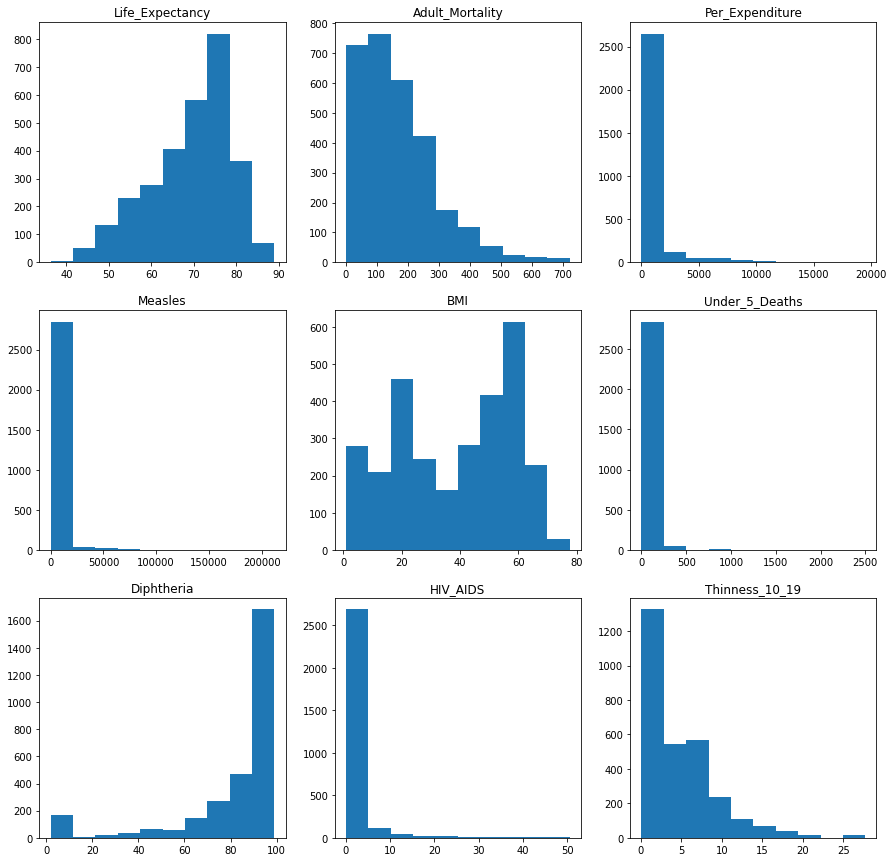

In [23]:
# Numerical features histograms

fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.hist(data_final.iloc[:,i])
    plt.title(data_final.columns[i])

In [24]:
# Numerical features statistics

data_final.describe()

,Life_Expectancy,Adult_Mortality,Per_Expenditure,Measles,BMI,Under_5_Deaths,Diphtheria,HIV_AIDS,Thinness_10_19
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,69.224932,164.796448,740.321185,2427.855874,38.291291,42.179303,82.390710,1.747712,4.833675
std,9.523867,124.292079,1990.930605,11485.970937,19.857308,160.700547,23.645132,5.085542,4.399553
min,36.300000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.100000,0.100000
25%,63.100000,74.000000,4.853964,0.000000,19.400000,0.000000,78.000000,0.100000,1.600000
50%,72.100000,144.000000,65.611455,17.000000,43.350000,4.000000,93.000000,0.100000,3.300000
75%,75.700000,228.000000,442.614322,362.250000,56.100000,28.000000,97.000000,0.800000,7.100000
max,89.000000,723.000000,19479.911610,212183.000000,77.600000,2500.000000,99.000000,50.600000,27.700000


'Life Expectancy' is left skewed with no apparent outliers.

'Adult Mortality' is right skewed with no apparent outliers.

'Percent Expenditure' is right skewed with almost all values between 0 and 2,000. We'll say values above 12,000 are outliers and will be removed.

'Measles' is right skewed with almost all values between 0 and 20,000. We'll say values above 80,000 are outliers and will be removed.

'BMI' has two peaks with very little skewness.

'Under 5 Deaths' is right skewed with almost all values between 0 and 250. We'll say values above 1,000 are outliers and will be removed.

'Diphtheria' is left skewed with an odd peak at the low end. We'll say values below 15 are outliers and will be removed.

'HIV/AIDS' is right skewed with most values between 0 and 5. We'll say values above 30 are outliers and will be removed.

'Thinness 10-19' is right skewed. We'll say values above 23 are outliers and will be removed.

In [25]:
# Remove Outliers

data_final = data_final[data_final['Per_Expenditure'] <= 12000]
data_final = data_final[data_final['Measles'] <= 80000]
data_final = data_final[data_final['Under_5_Deaths'] <= 1000]
data_final = data_final[data_final['Diphtheria'] > 15]
data_final = data_final[data_final['HIV_AIDS'] <= 30]
data_final = data_final[data_final['Thinness_10_19'] < 23]

The last thing we need to do to get the data ready for model building is to split the data into training and testing sets. 80% of the data will randomly get split into training and the remaining 20% will be put into testing.

In [26]:
# Split data for training and testing

data_train, data_test = train_test_split(data_final, train_size=0.8, random_state=42)
len(data_train), len(data_test)

(2153, 539)

The training dataset contains 2,153 points and testing contains 539.

# Data Description

We'll go through all features so that we understand them.

|Feature|Description|
|:--------|:-------------|
|Life_Expectancy|Target Feature: Life Expectancy in years|
|Status|Developed or Developing country|
|Adult_Mortality|Adult Mortality Rate: number of deaths per 1,000 population of people between age 15 and 60|
|Per_Expenditure|Expenditure on health as a percentage of Gross Domestic Product per capita|
|Measles|Number of reported cases of Measles per 1,000 population|
|BMI|Average Body Mass Index of entire population|
|Under_5_Deaths|Number of deaths of children under 5 years of age per 1,000 population|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1 year olds as a percentage|
|HIV_AIDS|HIV or AIDS deaths per 1,000 live births (0-4 years of age)|
|Thinness_10_19|Prevalence of Thinness among children/adolescents between ages 10 and 19 years as a percentage|

# Model Building

We'll build several multiple linear regression models and take a look at their summaries. Let's start with the full model that includes every possible predictor. Our goal is to find the best, most simple model to predict Life Expectancy.

In [31]:
# Full Model

full_model = smf.ols(formula='Life_Expectancy ~ C(Status) + Adult_Mortality + Per_Expenditure + Measles + BMI + Under_5_Deaths + Diphtheria + HIV_AIDS + Thinness_10_19', data=data_train).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     801.1
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:24:07   Log-Likelihood:                -6241.9
No. Observations:                2153   AIC:                         1.250e+04
Df Residuals:                    2143   BIC:                         1.256e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The full model contains one predictor ('Measles') that is not significant having a p-value of 0.412. We'll create a reduced model that doesn't include 'Measles'.

In [32]:
# Reduced Model

reduced_model = smf.ols(formula='Life_Expectancy ~ C(Status) + Adult_Mortality + Per_Expenditure + BMI + Under_5_Deaths + Diphtheria + HIV_AIDS + Thinness_10_19', data=data_train).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     901.3
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:01   Log-Likelihood:                -6242.2
No. Observations:                2153   AIC:                         1.250e+04
Df Residuals:                    2144   BIC:                         1.255e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Now we'll build two models based on the correlation plot we saw above. The first model will contain the features that have a correlation coefficient with 'Life Expectancy' above 0.4. The second model will contain the features that have a correlation coefficient with 'Life Expectancy' above 0.5.

In [33]:
# Correlation Model above 0.4

reduced_model_2 = smf.ols(formula='Life_Expectancy ~ C(Status) + Adult_Mortality + BMI + Diphtheria + HIV_AIDS + Thinness_10_19', data=data_train).fit()
print(reduced_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:29:20   Log-Likelihood:                -6302.7
No. Observations:                2153   AIC:                         1.262e+04
Df Residuals:                    2146   BIC:                         1.266e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [34]:
# Correlation Model above 0.5

reduced_model_3 = smf.ols(formula='Life_Expectancy ~ C(Status) + Adult_Mortality + BMI + HIV_AIDS', data=data_train).fit()
print(reduced_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1077.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:29:32   Log-Likelihood:                -6643.6
No. Observations:                2153   AIC:                         1.330e+04
Df Residuals:                    2148   BIC:                         1.333e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Results

Now that we've built four models, we'll see how they perform on the testing dataset.

In [35]:
# Adjusted R^2 values of models

full_r2adj = round(full_model.rsquared_adj,4)
red_r2adj = round(reduced_model.rsquared_adj,4)
red_2_r2adj = round(reduced_model_2.rsquared_adj,4)
red_3_r2adj = round(reduced_model_3.rsquared_adj,4)

We need to get extract the true Life Expectancy values for the test set and get the test set ready to test our models.

In [36]:
# Get true values

y_true = data_test['Life_Expectancy']
data_test = data_test.drop(columns=['Life_Expectancy'])

Now we'll calculate the predicted values, mean squared error, and mean absolute error for each model.

In [37]:
# Full Model
full_pred = full_model.predict(data_test)
full_mse = round(mean_squared_error(y_true,full_pred),4)
full_mae = round(mean_absolute_error(y_true,full_pred),4)

# Reduced Model
red_pred = reduced_model.predict(data_test)
red_mse = round(mean_squared_error(y_true,red_pred),4)
red_mae = round(mean_absolute_error(y_true,red_pred),4)

# Correlation >0.4 Model
red2_pred = reduced_model_2.predict(data_test)
red2_mse = round(mean_squared_error(y_true,red2_pred),4)
red2_mae = round(mean_absolute_error(y_true,red2_pred),4)

# Correlation >0.5 Model
red3_pred = reduced_model_3.predict(data_test)
red3_mse = round(mean_squared_error(y_true,red3_pred),4)
red3_mae = round(mean_absolute_error(y_true,red3_pred),4)

We'll display the metrics for easy comparison.

In [39]:
# Metrics Table

col_names = ['Adjusted R^2','MSE','MAE']
row_names = ['Full Model','Reduced Model','Correlation >0.4 Model','Correlation >0.5 Model']
res = pd.DataFrame([[full_r2adj,full_mse,full_mae],[red_r2adj,red_mse,red_mae],[red_2_r2adj,red2_mse,red2_mae],[red_3_r2adj,red3_mse,red3_mae]],row_names,col_names)
res

,Adjusted R^2,MSE,MAE
Full Model,0.7699,18.3574,3.2063
Reduced Model,0.7699,18.3400,3.2025
Correlation >0.4 Model,0.7569,19.3824,3.2854
Correlation >0.5 Model,0.6666,24.9694,3.7028


The Full, Reduced, and Correlation >0.4 models have very similar metrics with an adjusted $R^2$ value around 0.76, a MSE around 18-19, and a MAE around 3.2. The Correlation >0.5 model did not perform quite as well with an adjusted $R^2$ value of 0.67, a MSE of 25, and a MAE of 3.7.

# Conclusion

Of our four models, we would select our Correlation >0.4 Model since this model is significantly better than the Correlation >0.5 Model. It is more simple than the Full and Reduced models and neither of those two are signifcantly better. The Correlation >0.4 Model uses 'Status', 'Adult Mortality', 'BMI', 'Diphtheria', 'HIV/AIDS', and 'Thinness 10-19' to predict Life Expectancy. Since 'Status' is a binary categorical feature, there are two formulas depending on whether the country is developing or developed. The formulas are as follows:

Developing Country: $59.44 - 4.29 - 0.026*'AdultMortality' + 0.065*'BMI' + 0.2*'Diphtheria' - 0.58*'HIV/AIDS' - 0.21*'Thinness\mathit{10-19}'$

Developed Country: $59.44 - 0.026*'AdultMortality' + 0.065*'BMI' + 0.2*'Diphtheria' - 0.58*'HIV/AIDS' - 0.21*'Thinness\mathit{10-19}'$

This model has an adjusted $R^2$ value of 0.7569, a MSE of 19.3824, and a MAE of 3.2854. It does pretty good at accurately predicting life expectancy, but it definitely could do better.

# Future Work

This project only considered Multiple Linear Regression Models. But there are a lot more types of models out there. Let's take a look at each feature's relationship with life expectancy.

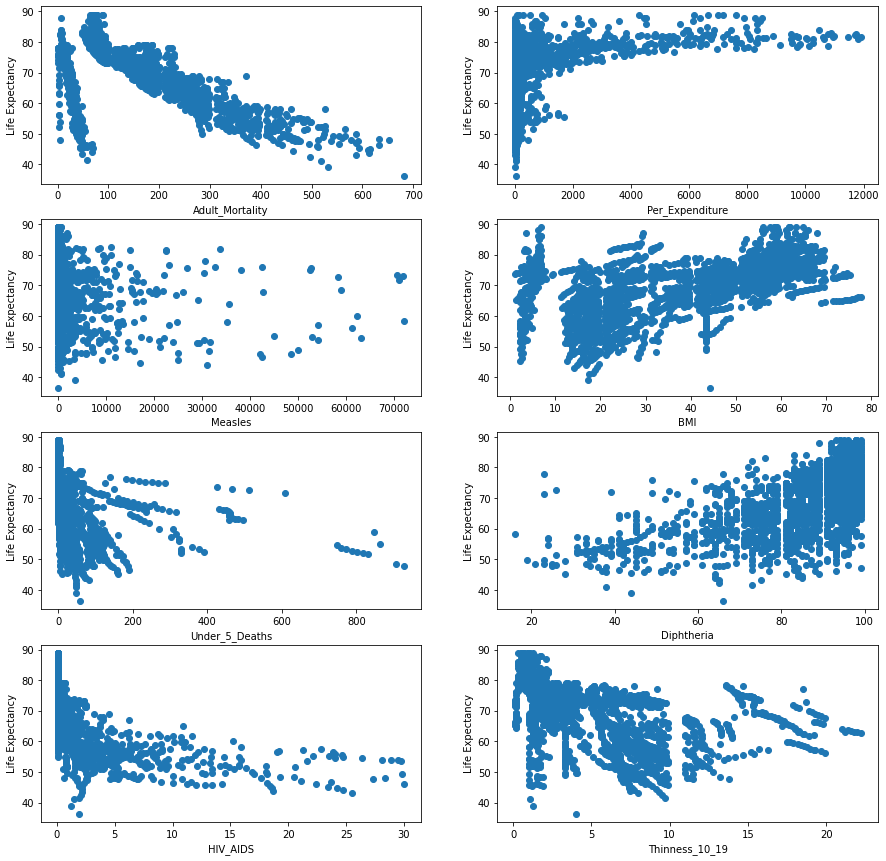

In [43]:
fig = plt.figure(figsize=(15,15))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.scatter(data_final.iloc[:,i+1],data_final['Life_Expectancy'])
    plt.xlabel(data_final.columns[i+1])
    plt.ylabel('Life Expectancy')

We can see from the scatter plots a few features, such as 'Adult Mortality', 'Per Expenditure', and 'HIV/AIDS', don't appear to have a linear relationship with life expectancy. In the future we can look at some models where these features are transformed rather than linear.

# References

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who